# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

In [29]:
RANDOM_STATE=333

# Parte 2: Clasificación

__Número de grupo: 2__

__Nombres de los estudiantes: Berta de Pablo e Iñigo Sanz__

Conjunto de datos relacionado con el diagnóstico de enfermedades cardiovasculares recopilado por el hospital _V.A. Medical Center, Long Beach and Cleveland Clinic Foundation (Robert Detrano, M.D., Ph.D.)_ y donado por David W. Aha a [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/Heart+Disease/).

El objetivo es distinguir si los pacientes tienen una enfermedad cardiovascular. El atributo `target` contiene un valor que puede ser 0 (no enfermedad) o 1-4 indicando distintos tipos de enfermedades.

Cada uno de los pacientes se describe mediante los siguientes atributos:
- `age`: age in years
- `sex`: sex (1 = male; 0 = female)
- `cp`: chest pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)
- `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
- `chol`: serum cholestoral in mg/dl
- `fbs`: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- `restecg`: resting electrocardiographic results (0: normal; 1:  ST-T wave abnormality; 2: probable or definite left ventricular hypertrophy)
- `thalach`: maximum heart rate achieved
- `exang`: exercise induced angina (1 = yes; 0 = no)
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`: the slope of the peak exercise ST segment (1: upsloping; 2: flat; 3: downsloping)
- `ca`: number of major vessels (0-3) colored by flourosopy
- `thal`: 3 = normal; 6 = fixed defect; 7 = reversable defect

Puede faltar datos en el conjunto de datos.

## 1) Carga del conjunto de datos

Carga el conjunto de datos en un dataframe a partir del fichero `cleveland.csv`. 

Como todas las variables están codificadas como números, debemos indicar cuales son categóricas. Podemos hacerlo en cada columna de la siguiente forma:
```python
df['sex'] = df['sex'].astype('category')
```

En este problema sólo nos interesa saber si los pacientes están enfermos o no así que modifica esa columna del dataframe para que sólo tenga dos valores de tipo cadena: 'normal' y 'enfermo'.

Elimina los pacientes que tengan datos incompletos.

In [30]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [31]:
df = pd.read_csv ('cleveland.csv')

# volvemos categoricas las siguientes columnas
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exang'] = df['exang'].astype('category')
df['slope'] = df['slope'].astype('category')
df['thal'] = df['thal'].astype('category')

dic_target = { 0 : 'normal', 1: 'enfermo', 2: 'enfermo', 3: 'enfermo', 4: 'enfermo'}
# todo lo que no sea normal lo consideramos como enfermo

df['target'] = df['target'].map(dic_target)

df = df.dropna(axis = 0)
print (df)

      age  sex   cp  trestbps   chol  fbs restecg  thalach exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0     2.0    150.0   0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0     2.0    108.0   1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0     2.0    129.0   1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0     0.0    187.0   0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0     2.0    172.0   0.0      1.4   
..    ...  ...  ...       ...    ...  ...     ...      ...   ...      ...   
297  57.0  0.0  4.0     140.0  241.0  0.0     0.0    123.0   1.0      0.2   
298  45.0  1.0  1.0     110.0  264.0  0.0     0.0    132.0   0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0     0.0    141.0   0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0     0.0    115.0   1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0     2.0    174.0   0.0      0.0   

    slope   ca thal   target  
0     3.0  0.0  6.0   normal  
1     2.0  3.

In [32]:
target_values = np.array(['normal', 'enfermo'], dtype = str) #creamos un np array

## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica si debemos tenerlo en cuenta de algún modo.

Comprueba los rangos y distribuciones de las variables numéricas.

Estudia las relaciones 2 a 2 de las variables numéricas. Dibuja el diagrama de dispersión y calcula los coeficientes de correlación de Pearson. ¿Hay pares variables que separen bien las clases? ¿Hay correlaciones claras entre las variables? 

¿Crees que va a ser un problema sencillo o complicado de resolver?

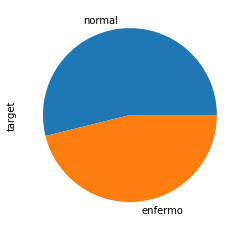

In [33]:
# Cuántas veces aparece cada paciente enfermo/normal en forma de tarta
df['target'].value_counts().plot.pie()

In [34]:
df['target'].value_counts()

normal     160
enfermo    137
Name: target, dtype: int64

In [35]:
# Frecuencia de las clases
df['target'].value_counts() / df['target'].count() * 100

normal     53.872054
enfermo    46.127946
Name: target, dtype: float64

__Comprueba si las clases a predecir están equilibradas y explica si debemos tenerlo en cuenta de algún modo.__

Se puede observar en esta gráfica que el número de personas "normales" y el número de enfermos es casi el mismo, 160 personas "normales" (53.872%) y 137 personas enfermas (46.1279%), teniendo en cuenta que el número de datos que tenemos es 297, las dos clases están equilibradas. Tendremos que tenerlo en cuenta a la hora de determinar la efectividad del sistema, si estas clases no hubiesen estado compensadas, hubiesemos necesitado calcular otras medidas como la tasa de verdaderos negativos ó positivos y el valor predictivo positivo para cada clase y luego hacer la media de todo esto para así entender cómo se comporta el sistema en cada una de las clases, en cambio, al tener las clases niveladas la medida de "exactitud" nos serviría para determinar la efectividad de nuestro sistema. Además, a la hora de realizar la división de conjuntos de entrenamiento y de test para encontrar el mejor modelo, no nos tendremos que preocupar por encontrar una partición estratificada de estos conjuntos ya que estas clases están bien equilibradas.

In [36]:
df.describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556,0.676768
std,9.049736,17.762806,51.997583,22.941562,1.166123,0.938965
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,276.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000


__Comprueba los rangos y distribuciones de las variables numéricas.__

Empezaremos analizando "age", podemos ver que tiene un rango de 29 a 77 años y que la media se sitúa en 54.5 años, como podemos observar en el histograma de debajo, "age" no sigue una distribución normal ya que no es equivalente a la gráfica de una distribución normal (la campana) ya que en la subida podemos observar cómo hay más pacientes que tienen 55 años y menos pacientes que tienen 52 y la barra de mayor frecuencia se sitúa después de 60, entonces esto hace que la subida sea escalonada y no contínua. 

Para las variables "oldpeak" y "ca" podemos observar que sus rangos son muy pequeños, de 0 a 6.2 y de 0 a 3 respectivamente. Sus gráficas de distribución obtienen una forma parecida, ambas muestran un sesgo positivo, es decir, la mayoría de los pacientes tienen valores entre 0 y 1 para estas dos variables como bien lo muestra la acumulación de los pacientes en la parte de la izquierda de ambos histogramas y, una minoría de los pacientes se sitúan en valores mayores a 1 representado por la baja densidad en la parte derecha de ambos histogramas.

Las tres últimas variables que nos quedan por analizar "trestbps", "chol" y "thalach" siguen una distribución normal, es decir, los pacientes se distribuyen de forma más o menos simétrica con respecto a el valor de mayor frecuencia, pero siempre siguiendo la forma de la campana sin ningún escalón. El valor de mayor frecuencia para cada variable es entre 135 y 140 para el "trestbps", entre 200 y 220 para el "chol" y entre 150 y 170 para el "thalach", valores que corresponden a la posición de las barras más altas (que representan a la mayoría de los pacientes) de los histogramas de estas variables. 

In [37]:
# coeficientes de correlación entre pares de variables
# Valor cercano a 1 indica correlación directa
# Valor cercano a -1 indica correlación inversa
# Valor cercano a 0 indica no correlación
df.corr(method='pearson')

,age,trestbps,chol,thalach,oldpeak,ca
age,1.000000,0.290476,0.202644,-0.394563,0.197123,0.362210
trestbps,0.290476,1.000000,0.131536,-0.049108,0.191243,0.097954
chol,0.202644,0.131536,1.000000,-0.000075,0.038596,0.115945
thalach,-0.394563,-0.049108,-0.000075,1.000000,-0.347640,-0.268727
oldpeak,0.197123,0.191243,0.038596,-0.347640,1.000000,0.294452
ca,0.362210,0.097954,0.115945,-0.268727,0.294452,1.000000


Esta tabla de coeficientes de correlación entre pares de variables la describiremos junto a las gráficas de correlación más abajo.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000168E4115130>,
      dtype=object)

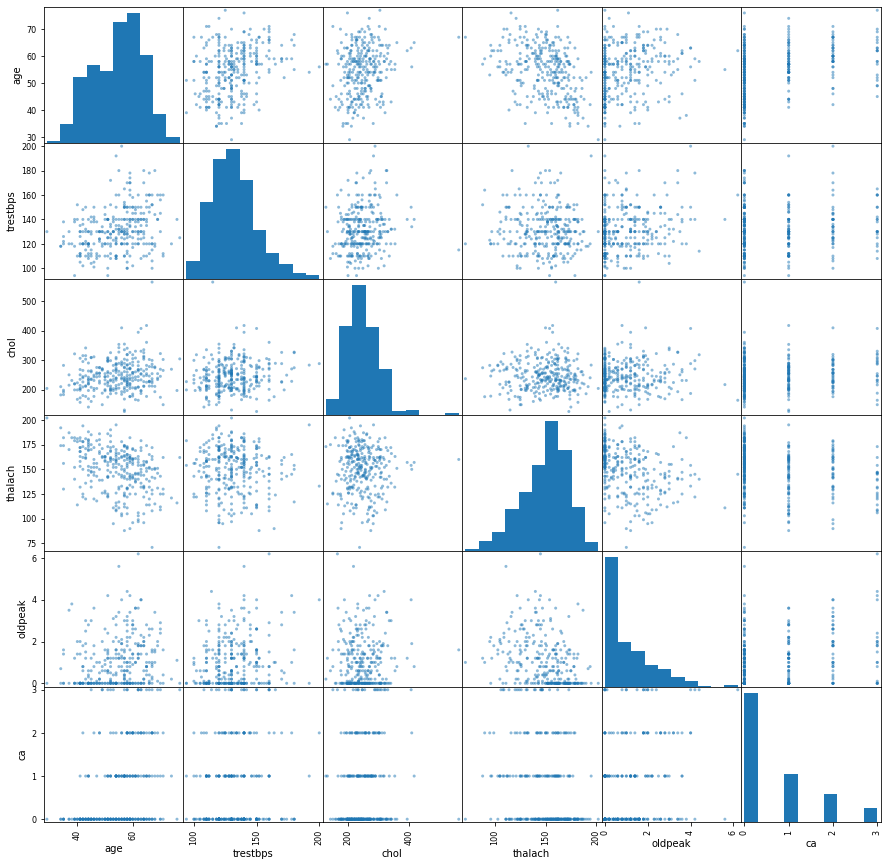

In [38]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (15, 15))

__¿Hay pares variables que separen bien las clases? ¿Hay correlaciones claras entre las variables? ¿Crees que va a ser un problema sencillo o complicado de resolver?__

Si nos fijamos en la tabla de correlación de las variables podemos ver que la directa más alta que tenemos es 0.362210 (entre la "edad" y "ca") y la inversa más alta que hay es -0.394563 (entre la "edad" y "la frecuencia cardíaca máx alcanzada (thalach)"), con esto queremos decir que todas las correlaciones entre pares de variables son mayores a -0.394563 y menores que 0.362210. Todos estos valores se acercan mucho más a 0 que a 1 ó -1 y, como utilizamos el método de pearson para calcular las correlaciones entre las variables, esto indica que no existe ningún tipo de correlación, ni directa ni indirecta, entre ningún par de variables.

Es por eso que los puntos de estos diagramas de dispersión no siguen apenas ningún orden, están distribuidos por toda la gráfica, y por tanto no podemos sacar ninguna información útil de ellas. Así que podemos concluir que, ningún par de variables consigue separar claramente en clases distintas a los datos que tenemos por la poca correlación que hay entre las variables que definen estos datos. 

Al no tener ni un sólo par de variables numéricas que separe en clases los elementos que estamos analizando, el problema va a ser más difícil de resolver ya que por ahora no tenemos información para dividir a las personas en distintos clusters.

## 3) Normalizar los datos

Decide razonadamente si es necesario escalar o estandarizar los datos teniendo en cuenta que vamos a construir un árbol de decisión.

En el caso en el que no fuesemos a construir un árbol de decisión, teniendo en cuenta que hay valores como "ca" que están en torno a 0 y 3 y otros como el "chol" que puede llegar a alcanzar el 500, sería necesario transformar la escala de representación de todas nuestras variables normalizando los datos ya que, no todas las variables numéricas seguían una distribución normal. Pero como vamos a construir un árbol de decisión y vamos a utilizar variables categóricas normalizar los datos no tendría sentido ya que los valores numéricos de las variables categóricas no representan nada, simplemente la categoría a la que pertenecen. Así que no será necesario escalar o normalizar los datos.

## 4) Profundidad óptima del árbol

Elige razonadamente la profundidad óptima del árbol de decisión usando validación cruzada en 10 partes. Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable `target`) y otro array que sólo contenga la variable de salida.

__Nota__: parece que la clase DecisionTreeClassifier no es capaz de trabajar con variables categóricas y usa sus correspondientes valores numéricos. Eso no es una buena idea porque establece una distancia entre las categorías que no tiene por qué tener sentido. Se podrían recodificar las variables categóricas usando un [OneHotEnconder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) pero en esta práctica no es necesario hacerlo.

In [39]:
df2 = df.drop(['target'], axis=1)
arrayEntrada = df2.values

In [40]:
df3 = df['target']
df3 = df3.map({'normal': 0, 'enfermo': 1})
arraySalida = df3.values

Una vez tenemos los datos guardados en un array de entrada (arrayEntrada) que contiene los datos de entrenamiento sin la variable target y un segundo array (arraySalida) que solo contiene la variable de salida 'target', podemos empezar a crear un modelo con el arbol de decisión.

CÓMO ELEGIR PROFUNDIDAD ÓPTIMA:

In [41]:
from sklearn.model_selection import cross_validate
import numpy as np

In [42]:
train_accuracy = []
test_accuracy = []

# Entrenamos y validamos varios árboles con distintas profundidades máximas
max_depths = range(1, 10)
for md in max_depths: # 10-partes con el criterio = "entropia".
    clf3 = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2, random_state=RANDOM_STATE)
    scores = cross_validate(clf3, arrayEntrada, arraySalida, scoring='accuracy', cv=10, return_train_score=True)
    
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))
    
train_accuracy, test_accuracy

([0.764682206942814,
  0.7706691262787189,
  0.8518516965733133,
  0.8720484655374812,
  0.9147059645592265,
  0.9495066800827324,
  0.9712085639219632,
  0.9843032030856952,
  0.9940172731846386],
 [0.7404597701149426,
  0.7205747126436781,
  0.7906896551724139,
  0.7641379310344828,
  0.7705747126436783,
  0.764367816091954,
  0.7709195402298851,
  0.7575862068965518,
  0.7540229885057471])

Para encontrar la profundidad máxima óptima lo que hacemos es construir 10 clasificadores, cada uno de ellos lo probamos con 
validación cruzada y vamos guardando la media de los resultados de cada uno de esos clasificadores en los arrays de train_accuracy
y test_accuracy. Aunque los valores que nos interesan siempre serán los de test_accuracy, ya que nos indican como se comporta el clasificador
para datos nuevos de entrada, también queremos sacar los datos de train_accuracy para poder ver en la gráfica de abajo cómo se comporta el 
clasificador con los datos nuevos comparado con los datos de entrenamiento.

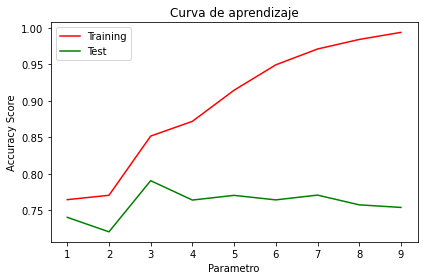

In [43]:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show() 

Como podemos ver en la gráfica, el clasificador se comporta mejor cuando alcanza el valor de profundidad 3, a partir de ahí la gráfica de training va aumentando su accuracy pero la de test desciende indicando que en esas profundidades el clasificador se comporta peor. El pico de nuestra gráfica nos indica que a partir de la porfundidad 3 es posible que el clasificador se pegue demasiado a los datos y que nuestro modelo sobreaprenda, así que es por eso que nos quedamos con max_depth = 3 y no con una profundidad más grande.

In [44]:
MAX_DEPTH = 3

## 5) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con la profundidad óptima y dibújalo. Analiza:
- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que hemos construido es capaz de separar las clases? 
- ¿En cuál de los nodos hoja existe mayor confusión?

CREACIÓN DEL ÁRBOL 

In [45]:
cols = df.columns
df1_columns = np.array(list(cols), dtype = str)
df1_columns

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='<U8')

In [46]:
# Creamos un árbol de decisión con la configuración por defecto y lo entrenamos
clf2 = DecisionTreeClassifier(criterion = "entropy", max_depth = MAX_DEPTH, random_state=RANDOM_STATE)
clf2 = clf2.fit(arrayEntrada, arraySalida)

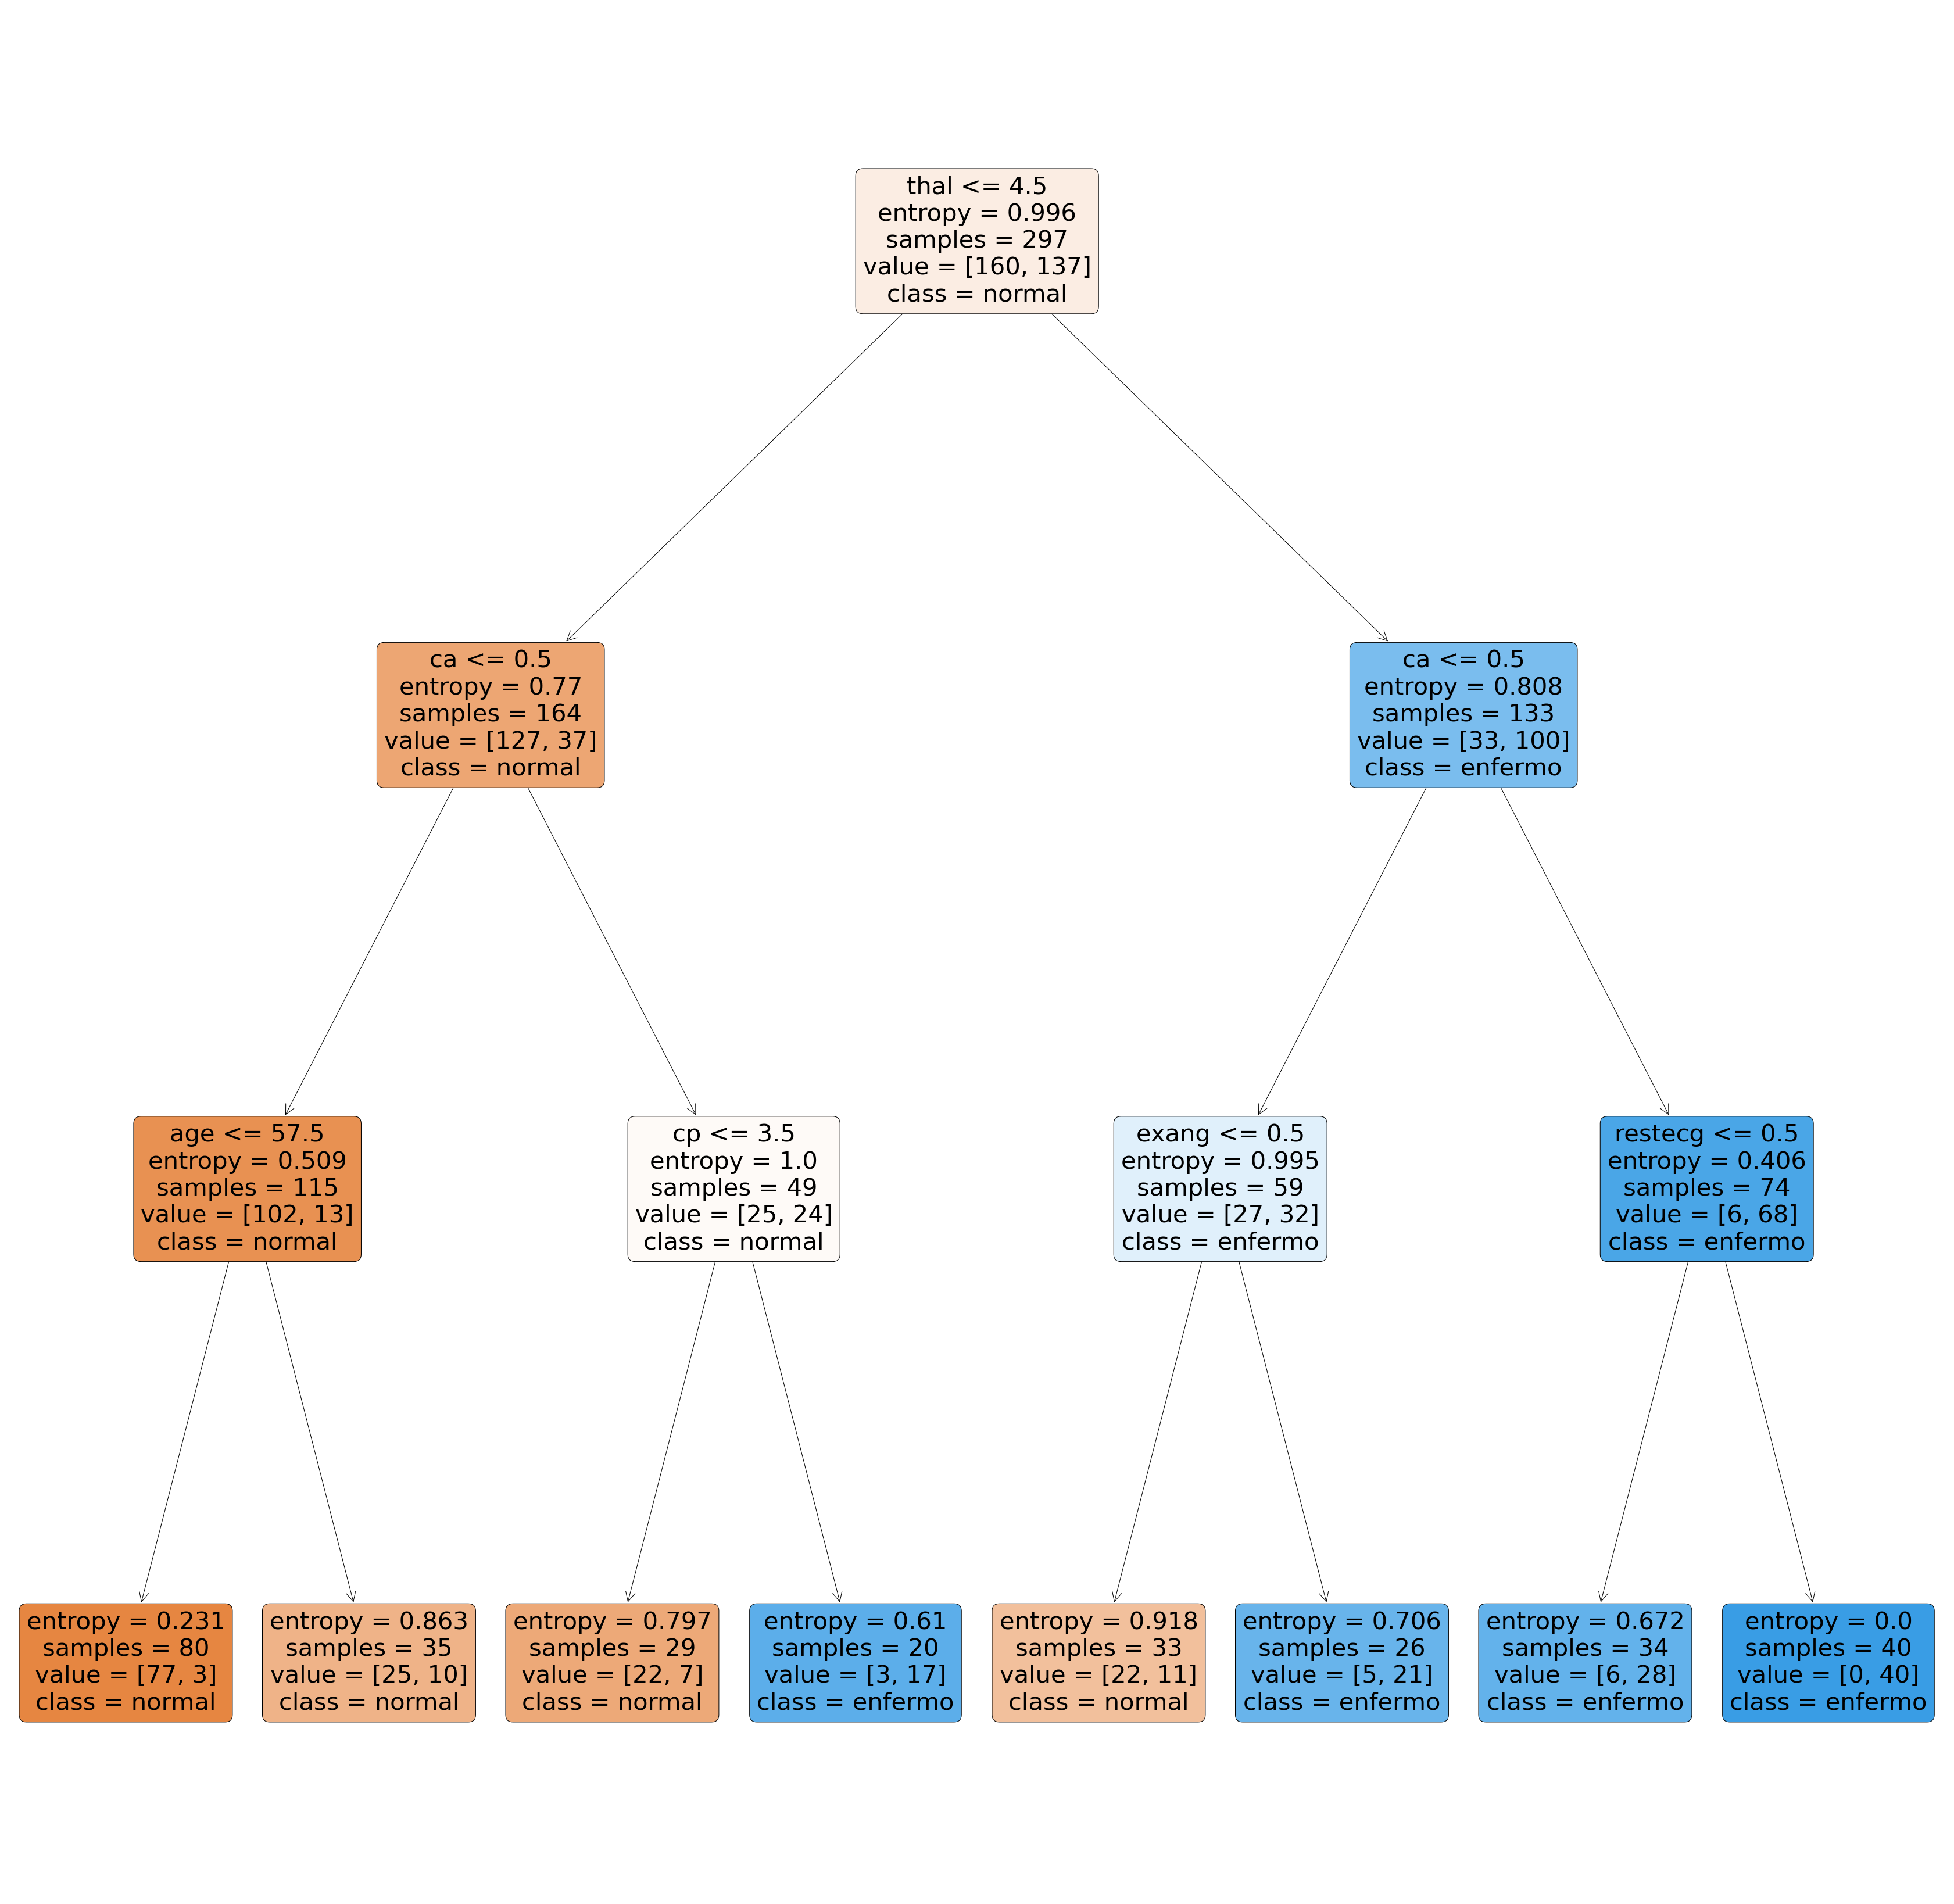

In [47]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Pintamos el árbol
plt.figure(figsize=(60,60))
plot_tree(clf2, filled=True, feature_names=df1_columns, class_names=target_values, rounded=True)
plt.show()

- __¿Cuáles son las variables más importantes y en qué orden?__

La primera variable más importante de nuestro árbol es "thal" ya que consigue dividir nuestro primer conjunto de elementos en dos subgrupos. El primero con 127 personas "normales" y 37 personas "enfermas" y el segundo subgrupo con 33 personas "normales" y 100 personas "enfermas", con lo cual, aunque aún no se ha conseguido separar en dos clases completamente diferenciadas, sí que se ha logrado que una gran mayoría de personas "normales" se sitúen en el árbol de la izquierda, en concreto un 79.38% del total de personas "normales", y en la rama de la derecha hemos conseguido que se coloque el 72.99% de las personas enfermas, así que esta primera variable ha conseguido una buena clasificación con un conjunto de datos grande.

La siguiente variable más importante sería el "ca", por ello se sitúa en el segundo nivel del árbol. La mejor división que hace es para la rama más a la izquierda del árbol dónde podemos observar que esta variable consigue dividir bien a las personas que no tienen enfermedad ya que consigue situar a un 80% de ellas en esta rama y con solo un 48% de los enfermos. Después, aunque el "ca" en el árbol derecho solo consigue separar a un 68% de los enfermos en la rama más a la derecha del árbol, podemos observar como la variable "restecg" consigue clasificar a un 58.8% de los 68 enfermos en su única clase "enfermo", además podemos ver que esta hoja es el único nodo heterogéneo de todas las hojas del árbol, no tiene ningún elemento "normal", su entropía es = 0  lo cual tiene sentido porque la clase está completamente ordenada, así que consideramos que la variable "restecg" sería la tercera más importante. 

Y por último, la variable "age" consigue llegar a una hoja con una entropía = 0.231 (muy cerca de 0) ya que tenemos un 96.25% de elementos de una única clase, por tanto decimos que esta variable "age" también consigue clasificar los elementos en sus clases con éxito. El resto de variables que utilizamos para dividir a nuestras personas en clases llegan a valores de entropía parecidos, por tanto no destacamos ninguna otra variable como importante para clasificar nuestros elementos.

- __¿Hay variables del conjunto de datos que no se han usado?__

Sí, las variables que no se han usado para clasificar las clases de los elementos son: sex, trestbps, chol, fbs, thalach, oldpeak, slope.

- __¿Cuál será la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta?__

Utilizando la formula de la accuracy = (VP + VN) / (VP + VN + FP + FN), mirando en la primera pregunta del arbol, aquella relacionada con la variable thalach, tenemos:
accuracy = (127 + 100) / (127 + 100 + 37 + 33) = 0.764

- __¿El árbol que hemos construido es capaz de separar las clases?__

Pensamos que sí es capaz de separar las clases ya que, aunque solo tengamos una hoja con una entropía = 0.0 (que separa completamente la clase "enfermo" para algunos elementos), necesitamos un árbol que se comporte bien con datos nuevos y no con los datos que tenemos de entrenamiento. Con esto queremos decir que, si hubiésemos conseguido un árbol con todas las hojas heterogéneas, es decir con una única clase, esto querría decir que hubiesemos obtenido una tasa de aciertos del 100% y entonces nuestro modelo se pegaría demasiado a los datos (lo habríamos sobreentrenado) y entonces, a nuevos datos de entrada le va a ser muy difícil clasificarlos de manera correcta. Además, consideramos que, menos en una hoja que explicaremos en la siguiente pregunta, el resto de las hojas existe una mayoría bastante notable entre la clase ganadora y la clase minoritaria, aunque no absoluta.

- __¿En cuál de los nodos hoja existe mayor confusión?__

La hoja donde hay más confusión es en la que tenemos una mayor entropía, es decir, la que está más desordenada que es la hoja donde hay 22 personas "normales" y 11 personas "enfermas" ya que, aunque en porcentaje la clase mayoritaria doble en número de elementos a la clase minoritaria, sigue habiendo solamente 11 elementos más entre una clase y otra y esto puede suponer que la división de clases en esta hoja no sea muy precisa.

## 6) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en un hospital real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

In [48]:
# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Construimos el clasificador
clf = DecisionTreeClassifier(criterion="entropy", max_depth=MAX_DEPTH, min_samples_split=2, random_state=RANDOM_STATE)

# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(clf, arrayEntrada, arraySalida, scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.8105482743239228
Exhaustividad ponderada media:  0.7906896551724139
F1 ponderado media:  0.7803052323807546


 __¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?__

Para este problema lo que nos interesa es que tanto la precisión como la exhaustividad obtengan valores altos porque nuestro objetivo es detectar a la mayoría de las personas enfermas y además no equivocarnos en la clasificación de "enfermos" y "normales". Por tanto, no nos interesa que solo la exhaustividad obtenga un valor muy alto porque aunque esto podría significar que hemos conseguido detectar todas las personas enfermas, como consecuencia podría suceder que de las personas que no padecen esa enfermedad muchas de ellas las hayamos clasificado como que sí tienen esa enfermedad y por tanto la tasa de precisión sería muy baja. Y tampoco nos interesa tener solo un valor de precisión alto porque podría suponer que, aunque hubiésemos acertado con todas las personas clasificadas como enfermas, para no arriesgarnos a fallar hayamos clasificado como "enfermos" muy pocos pacientes y entonces quedarían muchos sin detectar y el porcentaje de exhaustividad disminuiría muchísimo.

Después de esta explicación podemos concluir que nuestro sistema es bastante fiable ya que tenemos una precisión media de 0.81 y una exhaustividad media de 0.79, que además de ser valores bastante altos tenemos el equilibrio que estábamos buscando. 

Lo que calcula F1 es la media armónica entre la exhaustividad y la precisión y por eso sus objetivos son que ambos estén equilibrados y tengan valores altos, como ambas premisas se cumplen, nos sale un valor de F1 bastante alto. Para medir la fiabilidad o el buen comportamiento del sistema nos podemos fijar en este valor, ya que tiene en cuenta los dos anteriores, y otra vez, obtiene una media de 0.78 lo que consideramos un buen resultado para nuestro modelo, así que podemos concluir que nuestro clasificador tiene un comportamiento general óptimo.

In [49]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf4 = DecisionTreeClassifier(criterion="entropy", max_depth=MAX_DEPTH, min_samples_split=2, random_state=RANDOM_STATE)
predictions = cross_val_predict(clf4, arrayEntrada, arraySalida, cv=10)

# Informe por clases
cr = classification_report(arraySalida,predictions, target_names=target_values)
print(cr)

              precision    recall  f1-score   support

      normal       0.78      0.86      0.82       160
     enfermo       0.82      0.71      0.76       137

    accuracy                           0.79       297
   macro avg       0.80      0.79      0.79       297
weighted avg       0.79      0.79      0.79       297



__¿Cómo se comporta nuestro clasificador en cada una de las clases?__

Nuestro clasificador se comporta mejor para la clase "normal" que para "enfermo", ya que si nos fijamos en la media aritmética (F1) podemos ver que normal obtiene un 82% de aciertos, mientras que "enfermo" un 76%. Aunque ambas clases giran en torno a los mismos valores y por eso al haber calculado antes la precisión, la exhaustividad y el F1 medio nos salen valores muy parecidos a estos (ningún valor particular de cada clase hace que baje o suba mucho la media de los valores de ambas clases).

In [50]:
train_accuracy = []
test_accuracy = []

# Entrenamos y validamos varios árboles con distintas profundidades máximas

clf3 = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)
scores = cross_validate(clf3, arrayEntrada, arraySalida, scoring='accuracy', cv=10, return_train_score=True)
    
train_accuracy.append(np.mean(scores['train_score']))
test_accuracy.append(np.mean(scores['test_score']))
    
train_accuracy, test_accuracy

([0.8518516965733133], [0.7906896551724139])

In [51]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[0.8625    0.1375   ]
 [0.2919708 0.7080292]]


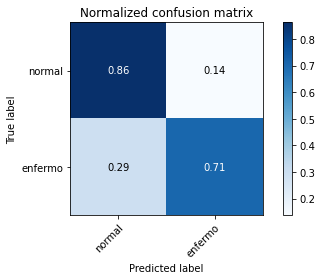

In [52]:
# El parámetro normalize permite mostrar los porcentajes en lugar del número de instancias
plot_confusion_matrix(arraySalida, predictions, target_values, normalize=True)

En la matriz de confusión nos salen los valores de exhaustividad del clasificador para cada clase, podemos observar que de las personas "normales" que hemos predicho hemos acertado un 86% y un 29% lo hemos clasificado como normal cuando en realidad era enfermo, y para la clase "enfermo" hemos acertado un 71% de las personas que hemos metido en esta clase y hemos fallado un 14% que hemos metido en la clase "normal" cuando en realidad era "enfermo". Así que podemos observar otra vez cómo el casificador acierta más poniendo a personas "normales" en su clase correcta que a personas enfermas, hay un 15% de diferencia de aciertos entre ambas clases.

__¿Cómo de fiable te parece? ¿crees que aportaría algo en un hospital real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.__

Este clasificador podría aportar algo en un hospital real para clasificar a pacientes enfermos y no enfermos dependiendo de dos cosas, la gravedad de la enfermedad y la cantidad de efectos secundarios que pueda tener la cura. Con esto queremos decir que, si queremos hacer una clasificación de enfermedades leves que tengan curas con efectos secundarios leves, este clasificador nos podría ser útil ya que, aunque nos podamos equivocar al decir que un 14% de los pacientes están enfermos cuando en realidad no lo están, si el médico les recetase alguna medicina que no fuese adecuada para ellos las consecuencias no serían muy graves y asumir este pequeño riesgo supondría conseguir identificar como enfermos a muchos pacientes.

En cambio, si hablamos de una cura a la enfermedad que suponga unos efectos secundarios importantes nos interesa que la 
precisión de nuestro clasificador sea máxima (porque este valor mide los aciertos que hemos tenido en las personas clasificadas como enfermas) no queremos arriesgarnos y darle a una persona que no padece la enfermedad un tratamiento que vaya a suponerle desarrollar innecesariamente otras enfermedades, para este caso nuestro clasificador no sería lo suficientemente preciso como para clasificar a personas enfermas.
Y si hablásemos de una enfermedad grave, de vida o muerte por ejemplo, lo que nos interesa es detectar a cuántas más personas 
mejor, es decir, que el porcentaje de exhaustividad fuese máximo, para este caso nuestro clasificador tampoco nos sería útil 
porque nos podríamos llegar a dejar un 29% de casos sin detectar y esto sería muy peligroso. 

Una de las principales ventajas de los árboles de decisión es que son muy interpretables, por ejemplo, si un médico necesitase saber por qué una persona ha sido clasificada como "normal" ó "enferma", puede analizar todos los pasos y todas las características de esa persona que se han tenido en cuenta para meterla en una clase u otra, lo único que tiene que hacer es mirar la rama que conecta el nodo hoja en el que se encuentre la persona clasificada y la raíz para saber toda esta información. Además, los árboles de decisión no son lineales porque para clasificar a una persona como "enferma" o "normal" no es necesario que todos tengan las mismas características, siguiendo distintas ramas podemos llegar a clasificar a dos personas con patologías distintas en la misma clase y esto nos facilita la capacidad de encontrar personas "normales" o "enfermas", ya que no todos los individuos de una misma clase tienen por qué tener exactamente los mismos datos para cada variable que estamos analizando. Otra ventaja es que con los árboles de decisión podemos trabajar con variables cuantitativas o categóricas, y en nuestro caso esto es importante ya que hemos usado variables como "cp" para poder formar el árbol y construir nuestro clasificador. Otra ventaja más es que nuestro árbol no tiene en cuenta variables irrelevantes para clasificar los datos, por lo que no hace falta preocuparse por variables poco pertinentes afectando el resultado.

Una desventaja de utilizar un clasificador basado en árboles de decisión es que no podemos asegurar que el árbol obtenido sea el óptimo y además, si añadimos nuevas características de los pacientes a nuestra base de datos tendríamos que reconstruir el árbol ya que habría que comprobar si esos nuevos datos consiguen una mejor clasificación de las clases, es decir, el árbol obtenido no es definitivo, dependerá de la base de datos con la que estemos trabajando.